In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import io
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/K-means/customers.csv'
customer = pd.read_csv(file_path)
customer.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preprocessing

In [5]:
customer.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [6]:
customer.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
customer.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [8]:
customer.loc[(customer['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=customer['MINIMUM_PAYMENTS'].mean()
customer.loc[(customer['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=customer['CREDIT_LIMIT'].mean()

In [9]:
customer.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


## OUTLIER DETECTION

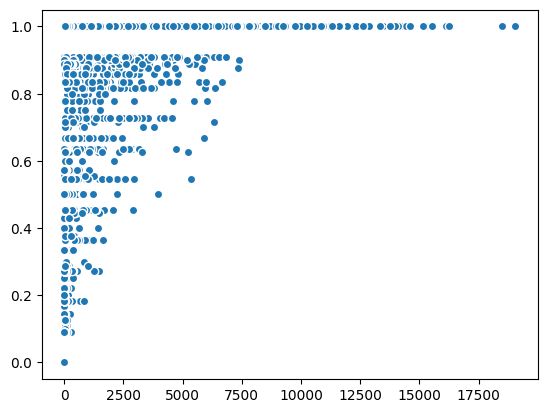

In [10]:
plt.scatter(customer["BALANCE"], customer["BALANCE_FREQUENCY"], edgecolors="white");

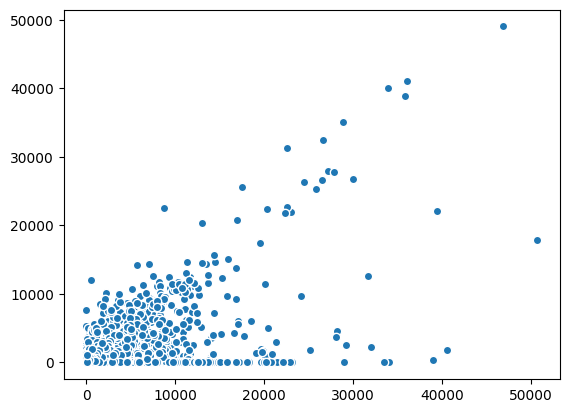

In [11]:
plt.scatter(customer["PAYMENTS"], customer["PURCHASES"], edgecolors="white");

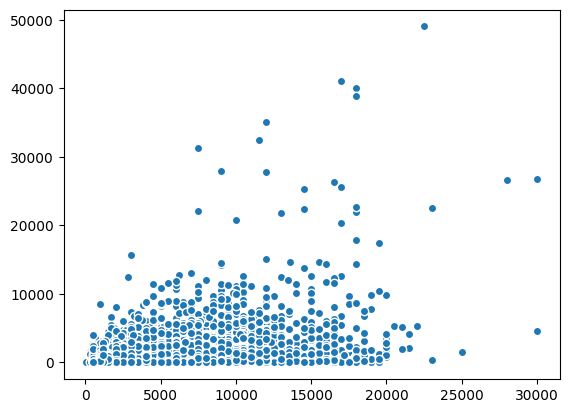

In [12]:
plt.scatter(customer["CREDIT_LIMIT"], customer["PURCHASES"], edgecolors="white");

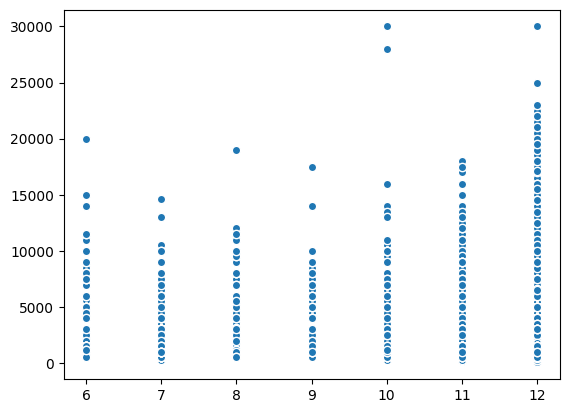

In [13]:
plt.scatter(customer["TENURE"], customer["CREDIT_LIMIT"], edgecolors="white");

In [14]:
df = customer.copy()
df = df.select_dtypes(include = ["float64", "int64"]) #it is not necessary cuz all variables that we've got are continuous
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
df1 = df["BALANCE"].copy()

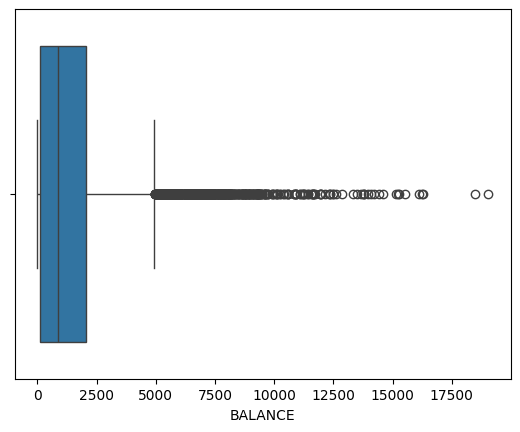

In [16]:
sns.boxplot(x=df1);

In [17]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    df_table = df[c].copy()
    Q1 = df_table.quantile(0.25)
    Q3 = df_table.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q1 + 1.5*IQR

    outliers_number = (( df_table < (lower_bound)) | (df_table > (upper_bound))).sum()
    outliers_number

    print("\n" + c)
    print("lower_bound is " + str(lower_bound))
    print("upper_bound is " + str(upper_bound))
    print("Q1 is : " + str(Q1))
    print("Q3 is : " + str(Q3))

    percentage = round((100*outliers_number) / (len(df_table)),2)
    print(str(outliers_number) + " of " + str(len(df_table)) + " is outlier (%" + str(percentage) + ")")



BALANCE
lower_bound is -2760.5052645
upper_bound is 3017.0690955000005
Q1 is : 128.2819155
Q3 is : 2054.1400355
1434 of 8950 is outlier (%16.02)

PURCHASES
lower_bound is -1566.1075000000003
upper_bound is 1645.3775000000003
Q1 is : 39.635
Q3 is : 1110.13
1539 of 8950 is outlier (%17.2)

ONEOFF_PURCHASES
lower_bound is -866.1075
upper_bound is 866.1075
Q1 is : 0.0
Q3 is : 577.405
1703 of 8950 is outlier (%19.03)

INSTALLMENTS_PURCHASES
lower_bound is -702.95625
upper_bound is 702.95625
Q1 is : 0.0
Q3 is : 468.6375
1561 of 8950 is outlier (%17.44)

CASH_ADVANCE
lower_bound is -1670.7317088750003
upper_bound is 1670.7317088750003
Q1 is : 0.0
Q3 is : 1113.8211392500002
1717 of 8950 is outlier (%19.18)

CREDIT_LIMIT
lower_bound is -5750.0
upper_bound is 8950.0
Q1 is : 1600.0
Q3 is : 6500.0
1129 of 8950 is outlier (%12.61)

PAYMENTS
lower_bound is -1893.5110601250003
upper_bound is 2660.0633921250005
Q1 is : 383.276166
Q3 is : 1901.1343167500002
1512 of 8950 is outlier (%16.89)

MINIMUM_PA

In [18]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=500)),Range]=1
    df.loc[((df[c]>500)&(df[c]<=1000)),Range]=2
    df.loc[((df[c]>1000)&(df[c]<=3000)),Range]=3
    df.loc[((df[c]>3000)&(df[c]<=5000)),Range]=4
    df.loc[((df[c]>5000)&(df[c]<=10000)),Range]=5
    df.loc[((df[c]>10000)),Range]=6

In [19]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10

In [20]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']

for c in columns:

    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=5)),Range]=1
    df.loc[((df[c]>5)&(df[c]<=10)),Range]=2
    df.loc[((df[c]>10)&(df[c]<=15)),Range]=3
    df.loc[((df[c]>15)&(df[c]<=20)),Range]=4
    df.loc[((df[c]>20)&(df[c]<=30)),Range]=5
    df.loc[((df[c]>30)&(df[c]<=50)),Range]=6
    df.loc[((df[c]>50)&(df[c]<=100)),Range]=7
    df.loc[((df[c]>100)),Range]=8

In [21]:
df.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(df)

## Normalization

In [22]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [23]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

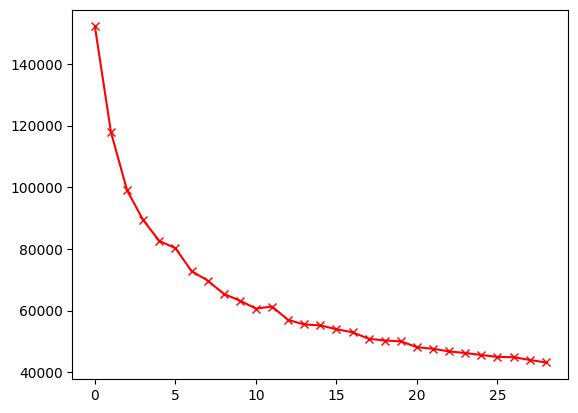

In [24]:
plt.plot(cost, 'rx-')

In [25]:
kmean= KMeans( n_clusters=6,  n_init=15, max_iter=20 , random_state=44)
kmean.fit(X)
labels=kmean.labels_

In [26]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,4
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,5
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,2
3,12,3,3,3,0,1,5,0,2,7,1,1,0,1,0,1,1,4
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,4


## Interpretation of clusters

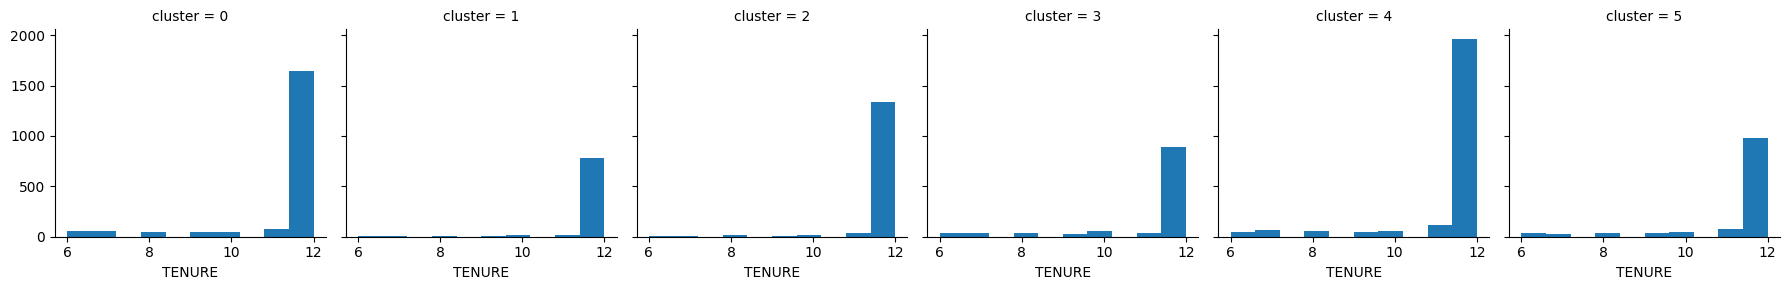

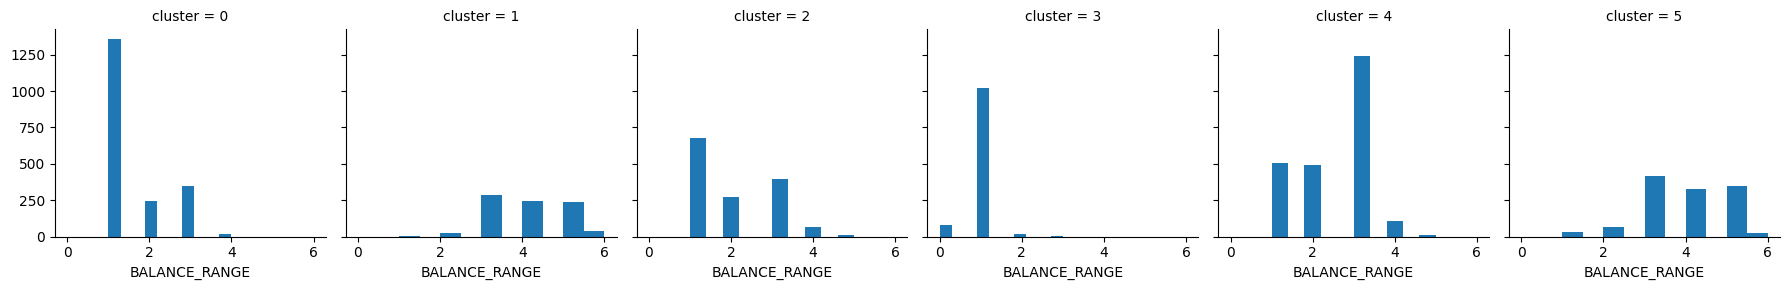

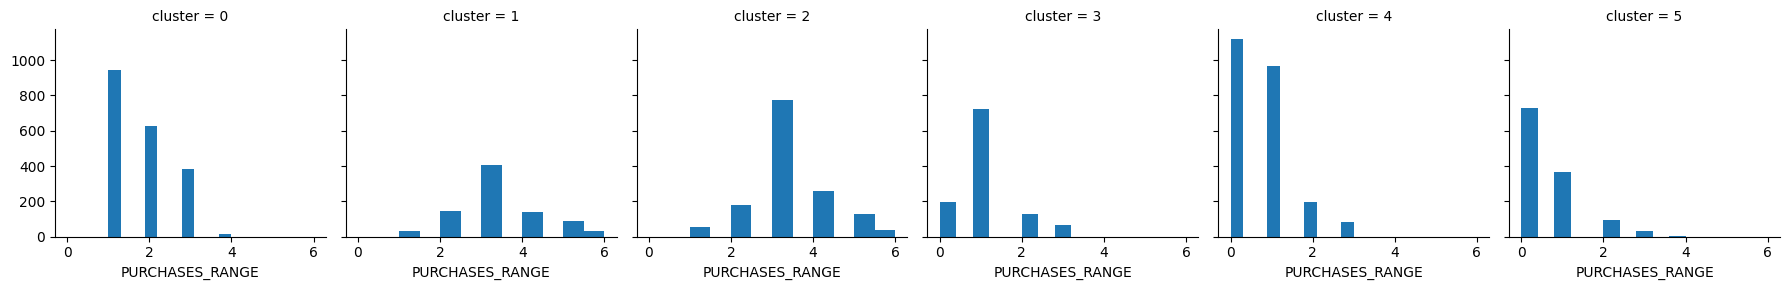

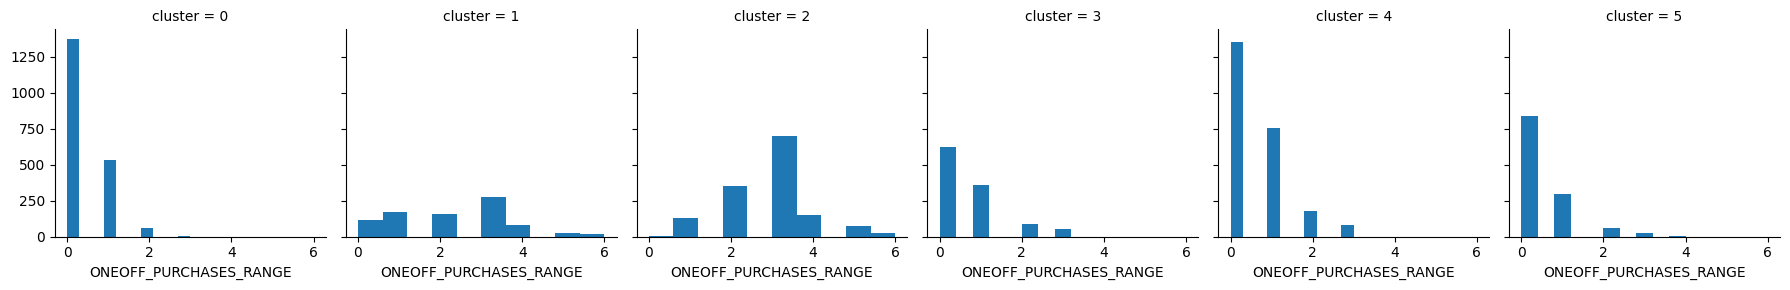

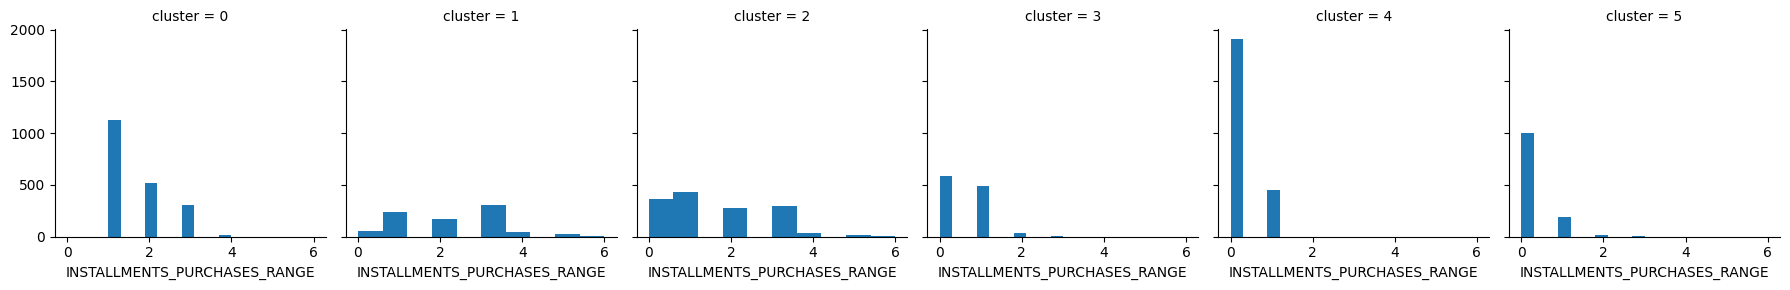

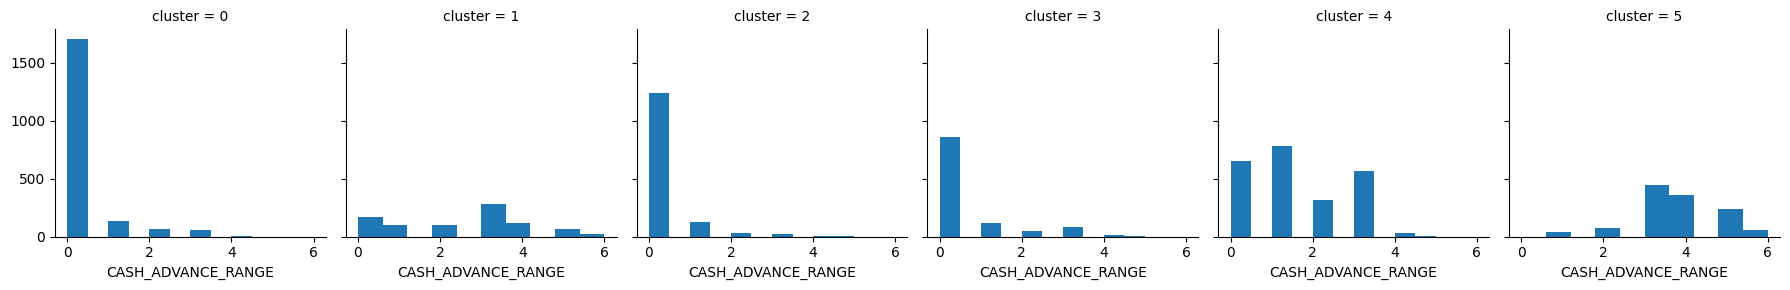

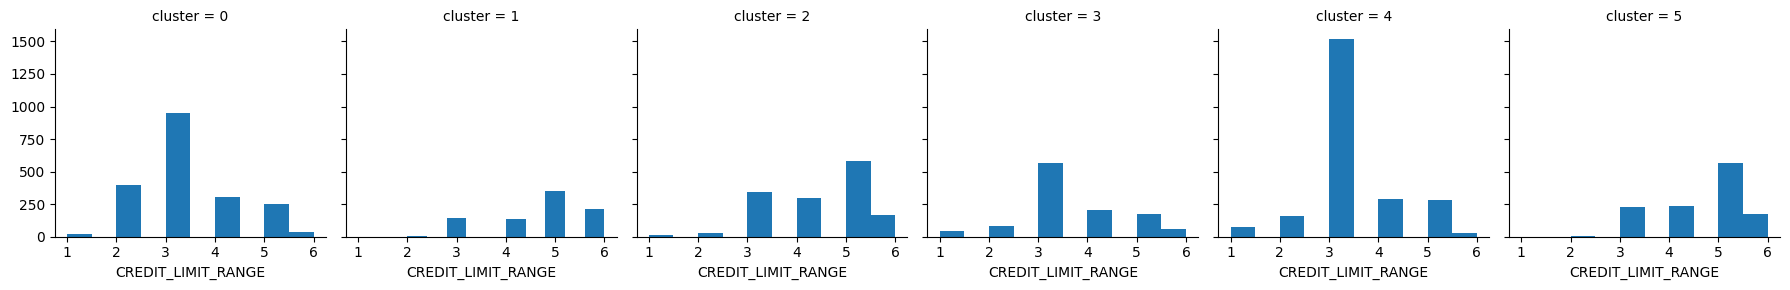

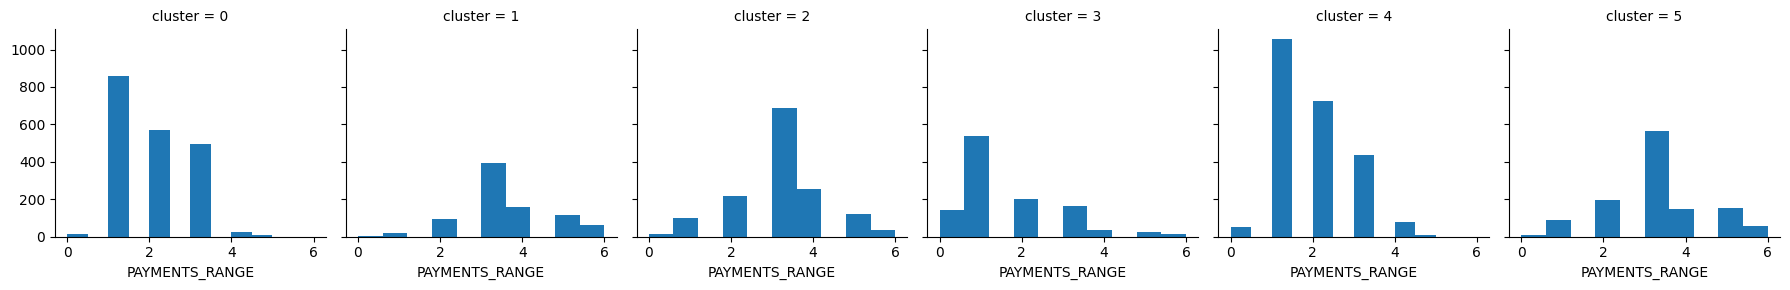

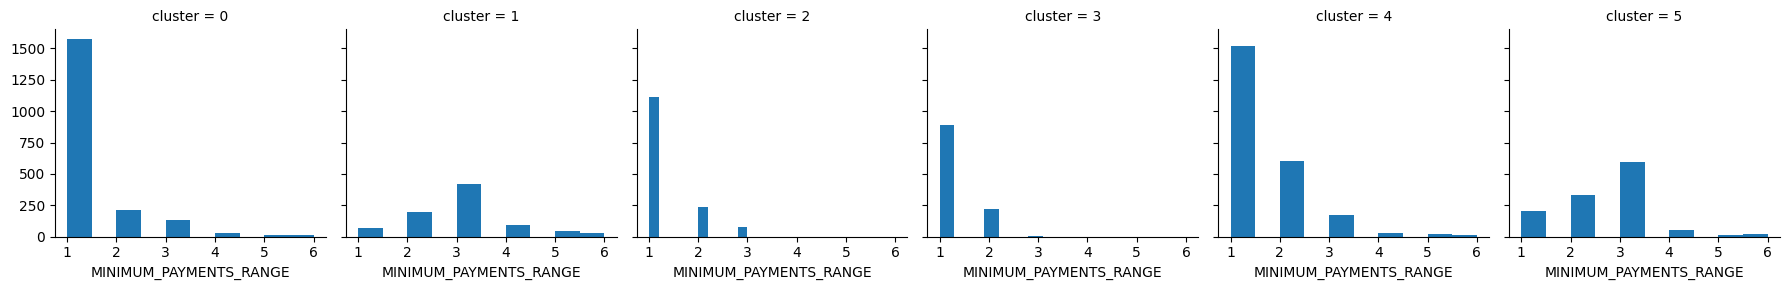

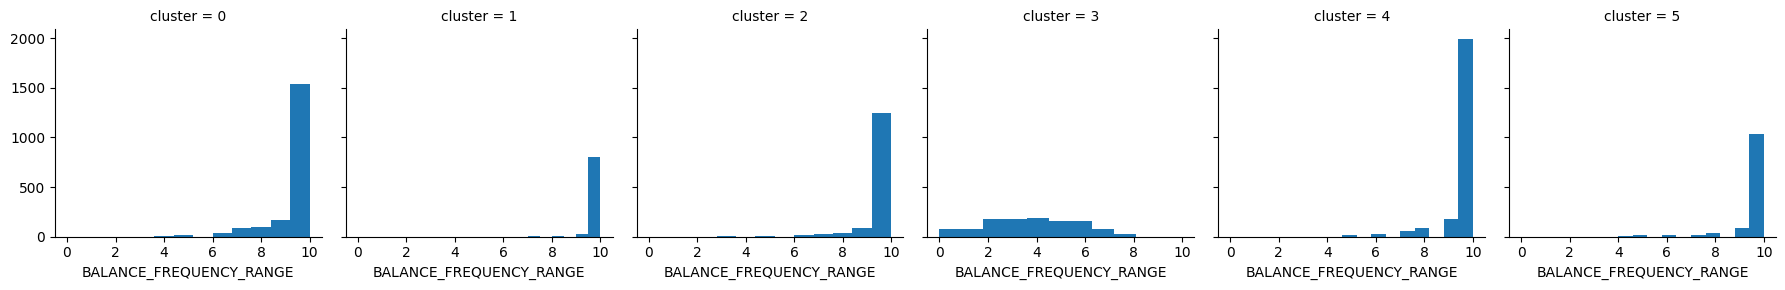

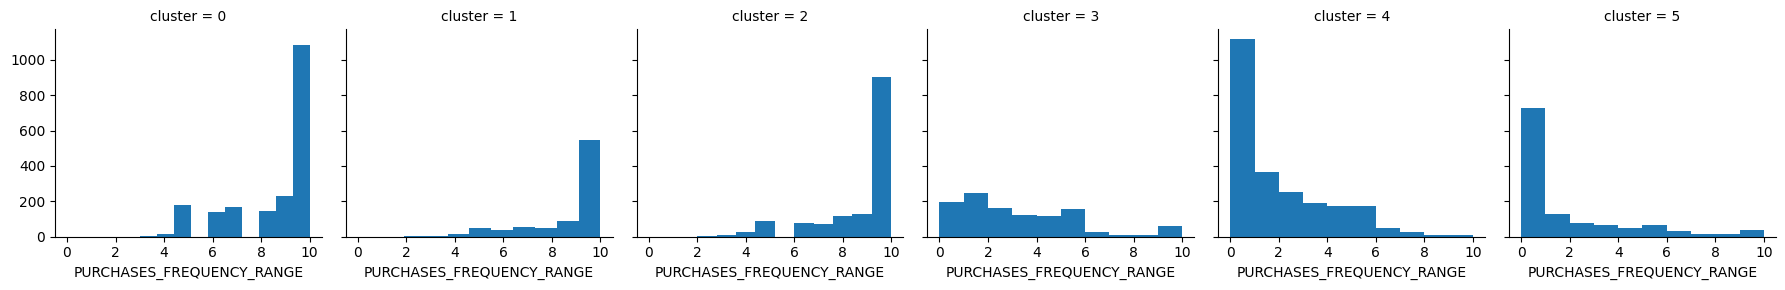

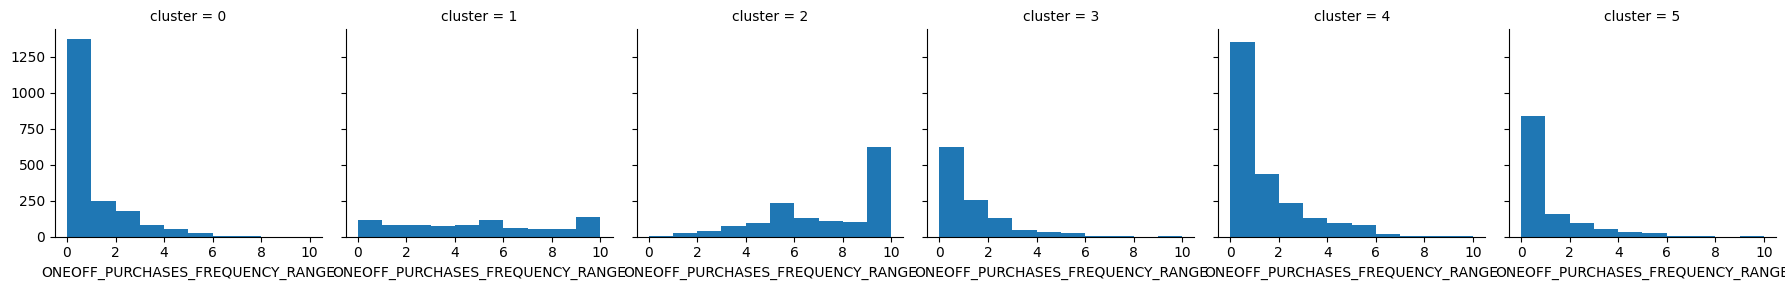

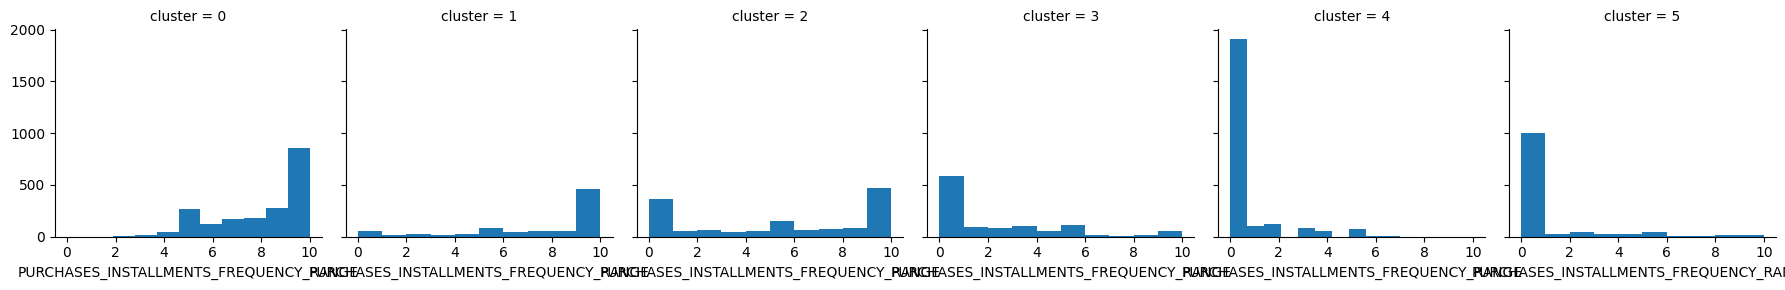

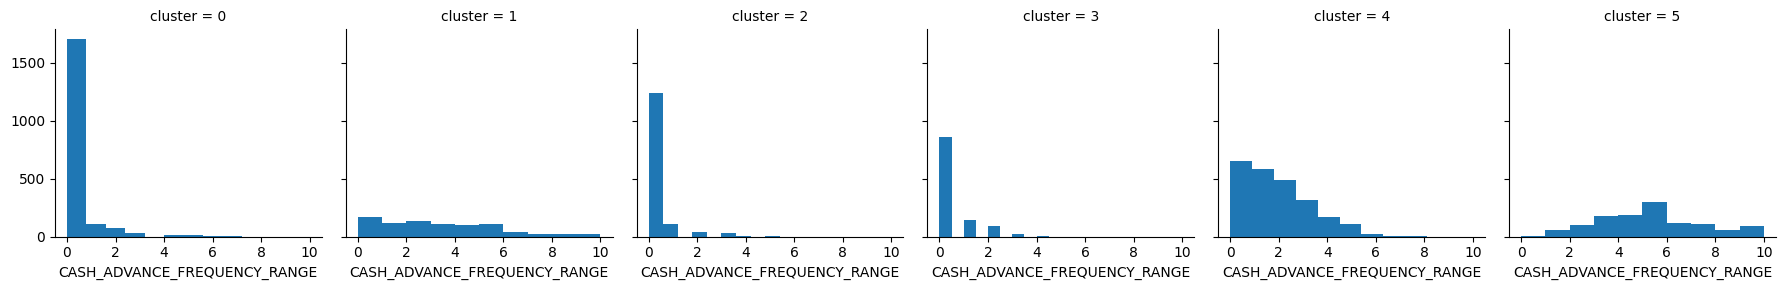

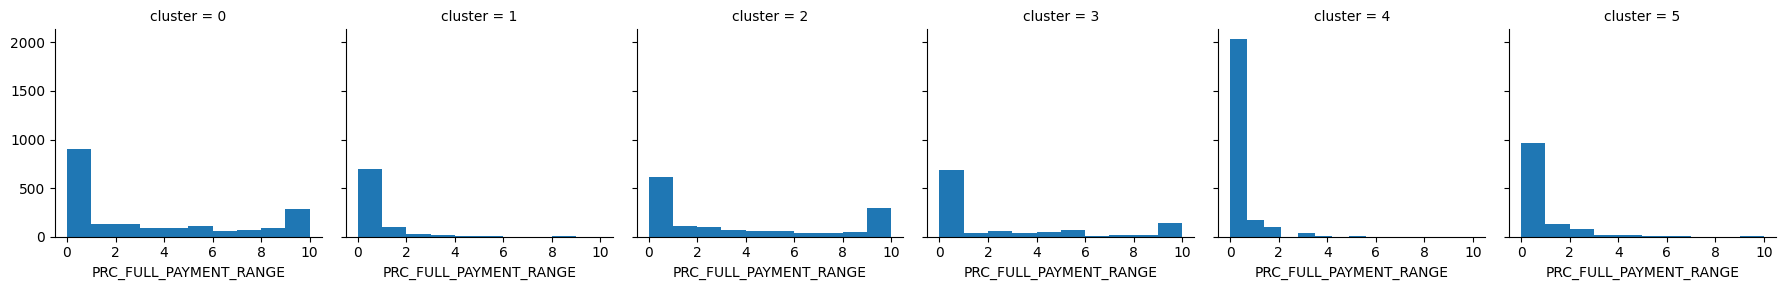

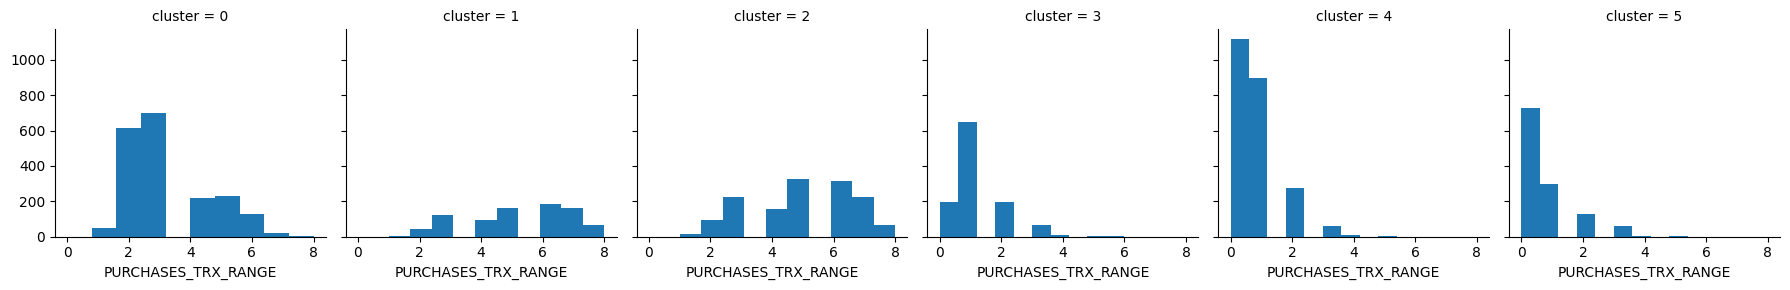

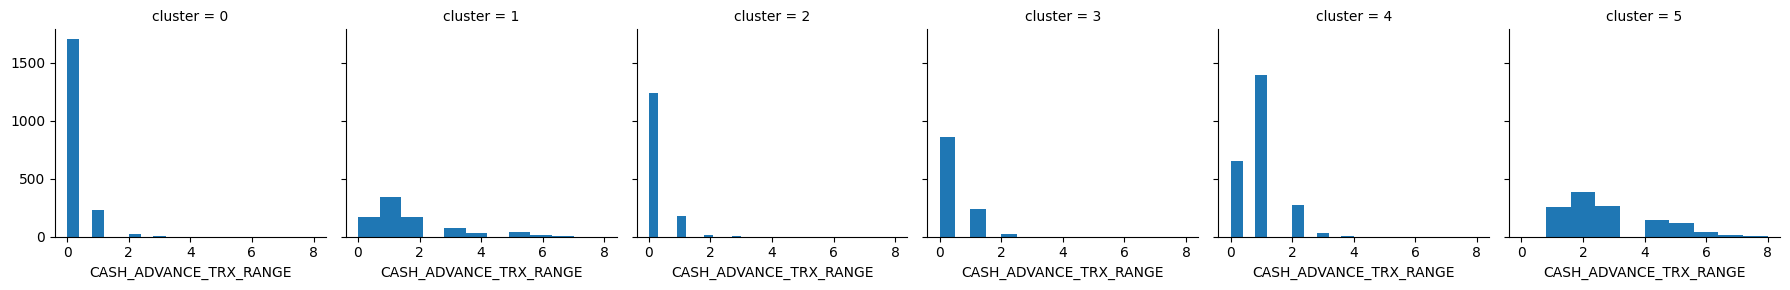

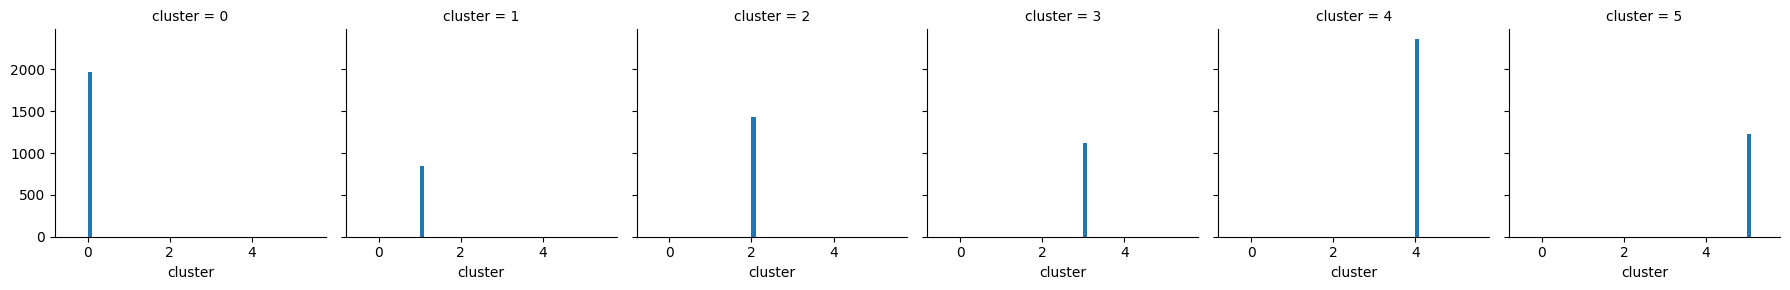

In [27]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

## Visualization

In [28]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

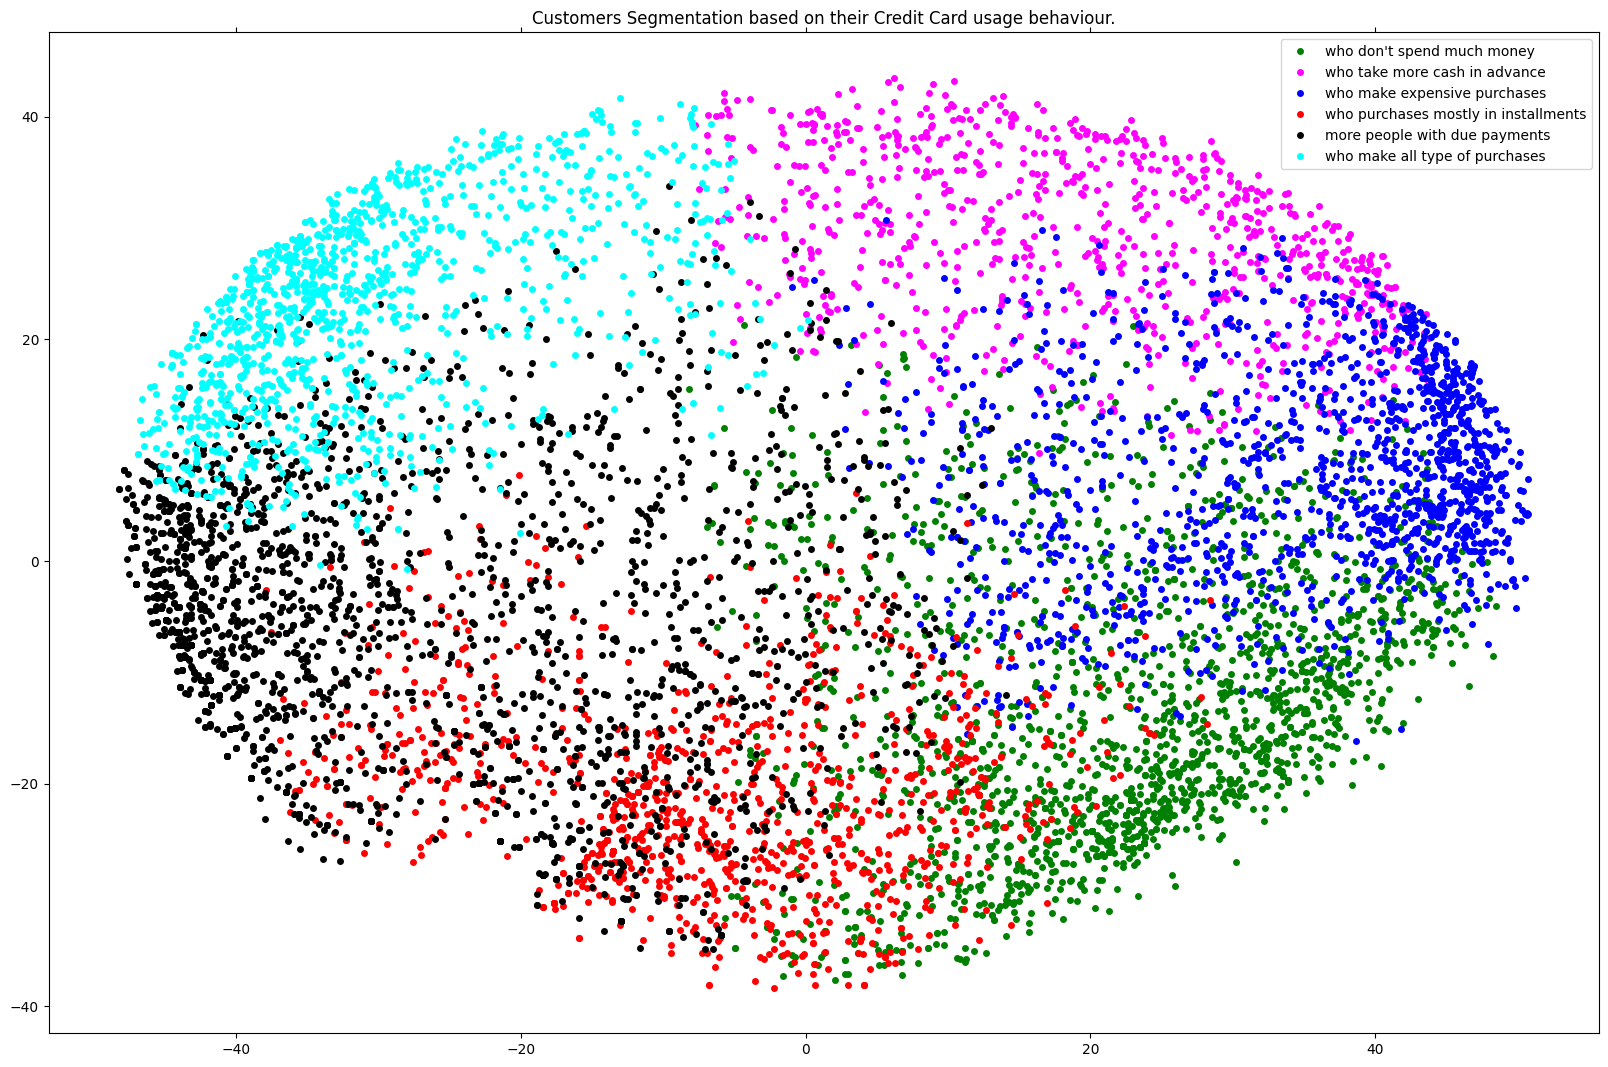

In [29]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {5: 'cyan',
          4: 'black',
          3: 'red',
          2: 'blue',
          1: 'magenta',
          0:'green'}

names = {5: 'who make all type of purchases',
         4: 'more people with due payments',
         3: 'who purchases mostly in installments',
         2: 'who make expensive purchases',
         1: 'who take more cash in advance',
         0:'who don\'t spend much money'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')

ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()

In [30]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute scores to evaluate clustering performance
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz = calinski_harabasz_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)

print("Clustering Performance Metrics:")
print(f"Silhouette Score: {silhouette_avg:.4f} (higher is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (higher is better)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")


Clustering Performance Metrics:
Silhouette Score: 0.1798 (higher is better)
Calinski-Harabasz Index: 1734.2564 (higher is better)
Davies-Bouldin Index: 1.6805 (lower is better)


Dataset shape: (8950, 18)

First few rows:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083

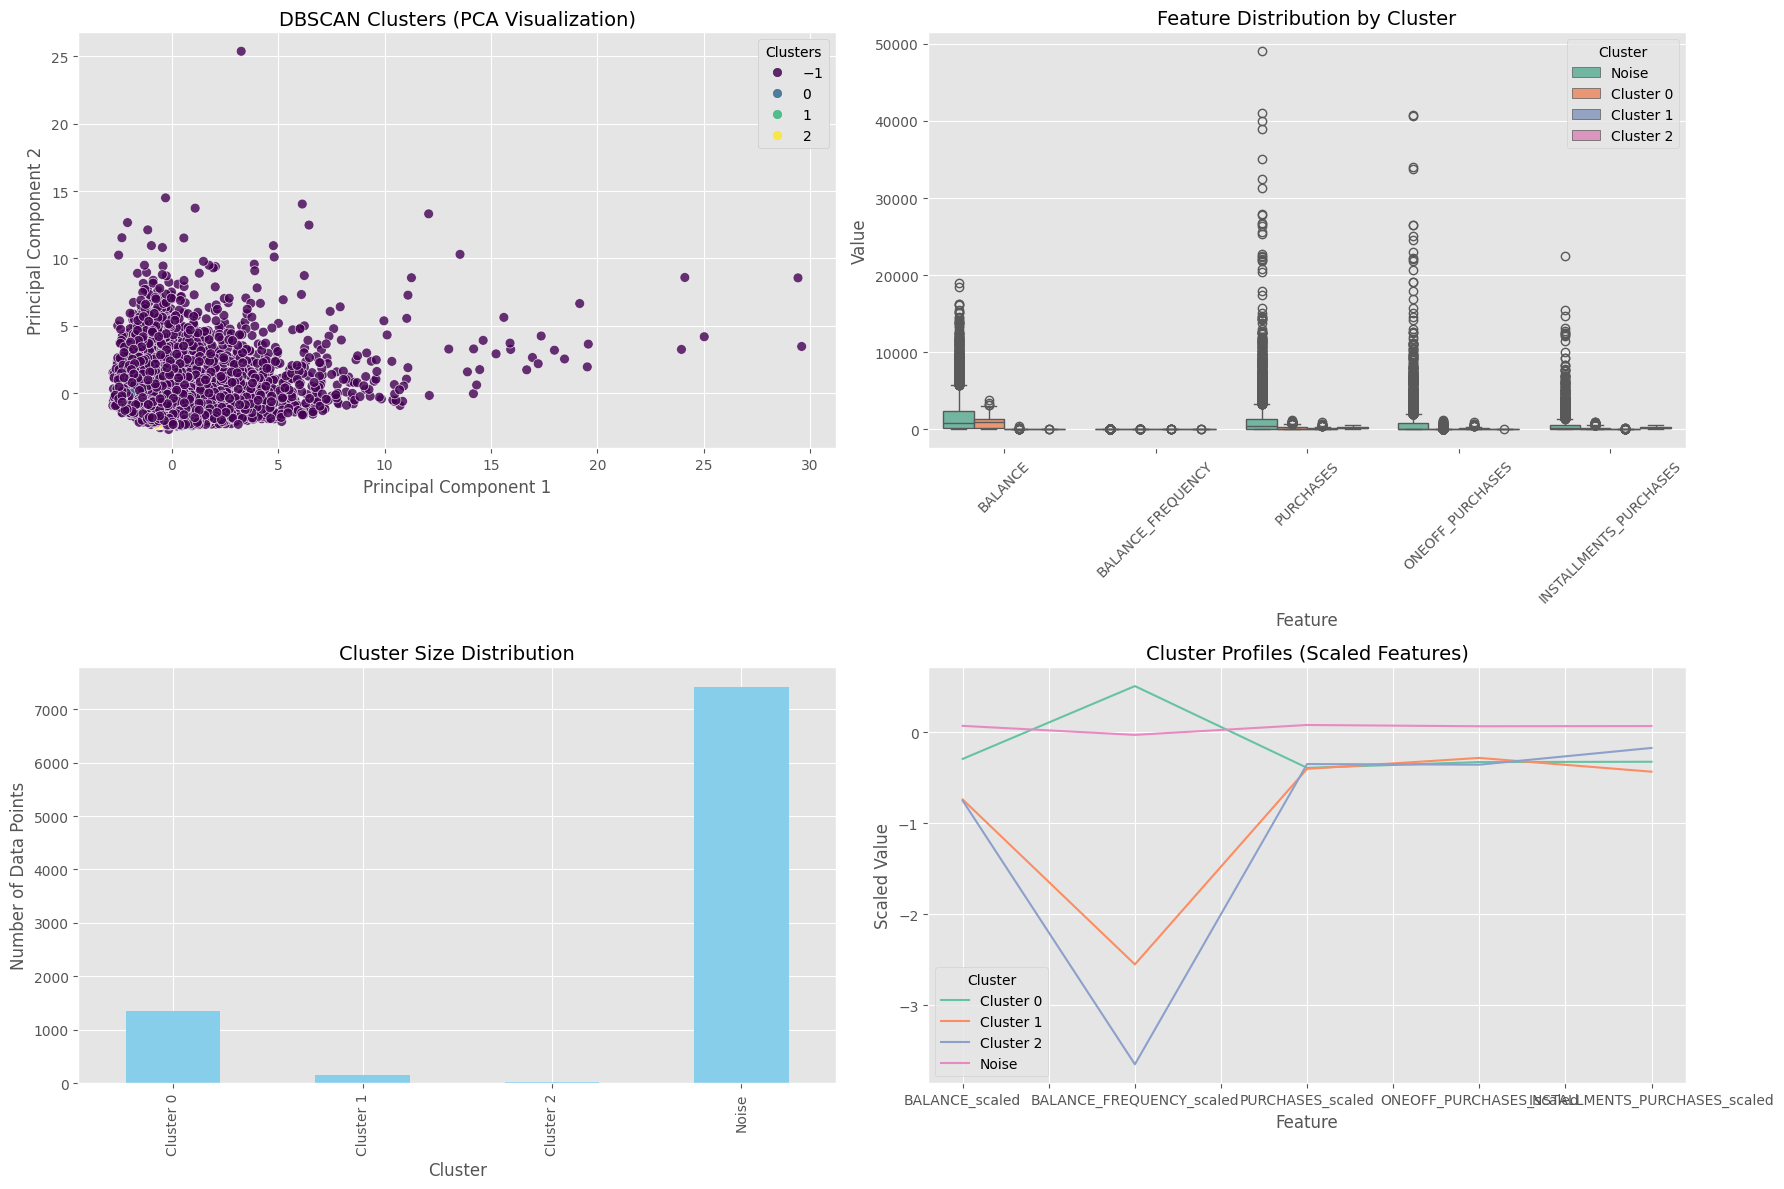


Clustered data saved to 'clustered_data.csv'


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('ggplot')
sns.set_palette("Set2")

# Read the CSV file
def load_and_prepare_data(file_path):
    # Load the data
    df = pd.read_csv(file_path)

    # Display basic information
    print(f"Dataset shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\nMissing values:")
        print(missing_values[missing_values > 0])
        # Fill missing values with median for numerical columns
        df = df.fillna(df.median(numeric_only=True))

    return df

# Function to perform DBSCAN clustering
def perform_dbscan(df, features, eps=0.5, min_samples=5):
    # Extract features for clustering
    X = df[features].copy()

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_scaled)

    # Add cluster labels to the dataframe
    df['cluster'] = clusters

    # Count number of clusters (excluding noise points which are labeled as -1)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = list(clusters).count(-1)

    print(f"\nDBSCAN clustering results:")
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")

    return df, X_scaled, clusters

# Function to evaluate clustering
def evaluate_clustering(X_scaled, clusters):
    # We need ground truth labels for ARI and NMI
    # Since we don't have them, we'll create approximate ones based on other features
    # This is for demonstration - in practice, you would use actual known labels if available

    # Let's use a simple KMeans as a baseline to compare against
    from sklearn.cluster import KMeans
    # Get the number of unique clusters from DBSCAN (excluding noise)
    n_clusters = len(set([c for c in clusters if c != -1]))
    if n_clusters > 0:
        # If DBSCAN found clusters, use that number
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    else:
        # If DBSCAN didn't find clusters, default to 2
        kmeans = KMeans(n_clusters=2, random_state=42)

    approx_labels = kmeans.fit_predict(X_scaled)

    # Calculate metrics
    metrics = {}

    # Only calculate ARI and NMI if we have more than one cluster
    if len(set(clusters)) > 1:
        metrics['ARI'] = adjusted_rand_score(approx_labels, clusters)
        metrics['NMI'] = normalized_mutual_info_score(approx_labels, clusters)
    else:
        metrics['ARI'] = np.nan
        metrics['NMI'] = np.nan

    # Calculate silhouette score if we have more than one cluster and not all points are noise
    non_noise_mask = clusters != -1
    if non_noise_mask.sum() > 1 and len(set(clusters[non_noise_mask])) > 1:
        metrics['Silhouette'] = silhouette_score(
            X_scaled[non_noise_mask],
            clusters[non_noise_mask]
        )
    else:
        metrics['Silhouette'] = np.nan

    print("\nClustering Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    return metrics

# Function to create visualizations
def visualize_clusters(df, X_scaled, clusters, features):
    # Create a figure with subplots
    fig = plt.figure(figsize=(18, 12))

    # 1. Scatterplot of clusters using PCA for dimension reduction
    ax1 = plt.subplot(2, 2, 1)

    # Apply PCA to reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Create a scatter plot
    scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis',
                         alpha=0.8, s=50, edgecolors='w')

    # Add a legend
    legend1 = ax1.legend(*scatter.legend_elements(),
                        loc="upper right", title="Clusters")
    ax1.add_artist(legend1)

    ax1.set_title('DBSCAN Clusters (PCA Visualization)', fontsize=14)
    ax1.set_xlabel('Principal Component 1', fontsize=12)
    ax1.set_ylabel('Principal Component 2', fontsize=12)

    # 2. Boxplot of key features by cluster
    ax2 = plt.subplot(2, 2, 2)

    # Create a copy of the dataframe with cluster labels
    df_plot = df.copy()
    df_plot['Cluster'] = ['Noise' if c == -1 else f'Cluster {c}' for c in clusters]

    # Melt the dataframe for easier plotting
    df_melt = pd.melt(df_plot, id_vars=['Cluster'], value_vars=features[:5],
                      var_name='Feature', value_name='Value')

    # Create boxplot
    sns.boxplot(x='Feature', y='Value', hue='Cluster', data=df_melt, ax=ax2)
    ax2.set_title('Feature Distribution by Cluster', fontsize=14)
    ax2.set_xlabel('Feature', fontsize=12)
    ax2.set_ylabel('Value', fontsize=12)
    plt.xticks(rotation=45)

    # 3. Distribution of cluster sizes
    ax3 = plt.subplot(2, 2, 3)
    cluster_counts = df_plot['Cluster'].value_counts().sort_index()
    cluster_counts.plot(kind='bar', ax=ax3, color='skyblue')
    ax3.set_title('Cluster Size Distribution', fontsize=14)
    ax3.set_xlabel('Cluster', fontsize=12)
    ax3.set_ylabel('Number of Data Points', fontsize=12)

    # 4. Parallel coordinates plot for the clusters (first 5 features)
    ax4 = plt.subplot(2, 2, 4)

    # Add the scaled data to the dataframe
    scaled_df = pd.DataFrame(X_scaled, columns=[f'{feat}_scaled' for feat in features])
    scaled_df['Cluster'] = ['Noise' if c == -1 else f'Cluster {c}' for c in clusters]

    # Select a subset of features for the parallel coordinates plot
    selected_features = [f'{feat}_scaled' for feat in features[:5]]

    # Plot each cluster
    for cluster_name, cluster_data in scaled_df.groupby('Cluster'):
        cluster_data[selected_features].mean().plot(ax=ax4, label=cluster_name)

    ax4.set_title('Cluster Profiles (Scaled Features)', fontsize=14)
    ax4.set_xlabel('Feature', fontsize=12)
    ax4.set_ylabel('Scaled Value', fontsize=12)
    ax4.legend(title='Cluster')

    # Adjust layout
    plt.tight_layout()
    plt.savefig('dbscan_clustering_results.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main function
def main():
    # File path - change this to your actual file path
    file_path = '/content/drive/MyDrive/K-means/customers.csv'  # Replace with your actual file path

    # Load data
    try:
        df = load_and_prepare_data(file_path)
    except Exception as e:
        print(f"Error loading data: {e}")
        print("Using example placeholder data instead.")
        return

    # Select features for clustering (excluding ID and target columns)
    # Adjust this based on your actual data columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove any ID columns or target columns if needed
    features = [col for col in numeric_columns if
                not col.lower().endswith('id') and
                'cluster' not in col.lower()]

    print(f"\nSelected features for clustering: {features}")

    # Try different DBSCAN parameters to find the best clustering
    best_silhouette = -1
    best_params = {}
    best_clusters = None
    best_X_scaled = None

    # Grid search for DBSCAN parameters
    eps_values = [0.3, 0.5, 0.7, 1.0]
    min_samples_values = [3, 5, 10, 15]

    print("\nPerforming grid search for optimal DBSCAN parameters...")

    for eps in eps_values:
        for min_samples in min_samples_values:
            print(f"\nTrying DBSCAN with eps={eps}, min_samples={min_samples}")
            df_clustered, X_scaled, clusters = perform_dbscan(
                df.copy(), features, eps=eps, min_samples=min_samples
            )

            # Calculate silhouette score if possible
            non_noise_mask = clusters != -1
            n_clusters = len(set(clusters[non_noise_mask]))

            if n_clusters >= 2 and np.sum(non_noise_mask) > n_clusters:
                try:
                    sil_score = silhouette_score(
                        X_scaled[non_noise_mask],
                        clusters[non_noise_mask]
                    )
                    print(f"Silhouette score: {sil_score:.4f}")

                    if sil_score > best_silhouette:
                        best_silhouette = sil_score
                        best_params = {'eps': eps, 'min_samples': min_samples}
                        best_clusters = clusters
                        best_X_scaled = X_scaled
                except Exception as e:
                    print(f"Could not calculate silhouette score: {e}")
            else:
                print("Insufficient clusters or too many noise points for silhouette score")

    # Use the best parameters found
    if best_params:
        print(f"\nBest DBSCAN parameters: {best_params}")
        df_clustered, X_scaled, clusters = perform_dbscan(
            df.copy(), features, eps=best_params['eps'], min_samples=best_params['min_samples']
        )
    else:
        print("\nCould not find optimal parameters. Using default values.")
        df_clustered, X_scaled, clusters = perform_dbscan(df.copy(), features)

    # Evaluate the clustering
    metrics = evaluate_clustering(X_scaled, clusters)

    # Visualize the results
    visualize_clusters(df_clustered, X_scaled, clusters, features)

    # Save the clusters to a new CSV file
    df_clustered.to_csv('clustered_data.csv', index=False)
    print("\nClustered data saved to 'clustered_data.csv'")

if __name__ == "__main__":
    main()

DBSCAN Clustering Results:
Number of clusters: 36
Number of noise points: 6624

Clustering Performance Metrics:
Silhouette Score: -0.4659 (higher is better, range: -1 to 1)
Calinski-Harabasz Index: 18.1950 (higher is better)
Davies-Bouldin Index: 1.3613 (lower is better)


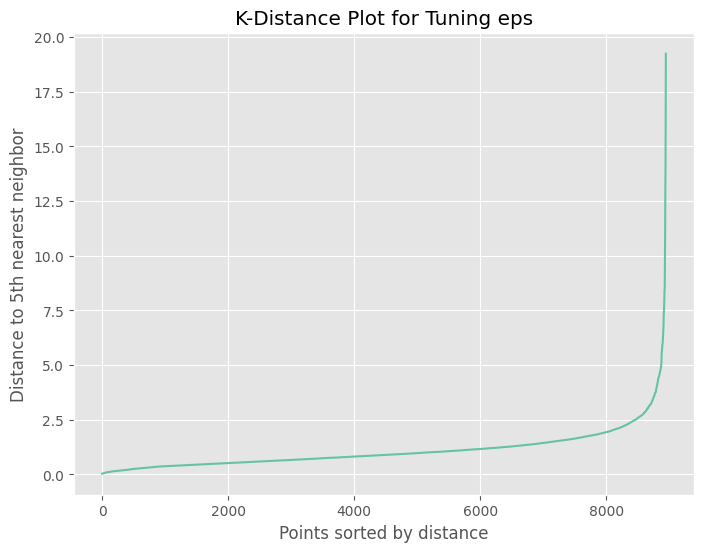

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings(action="ignore")

# Load the dataset
# Adjust the file path as needed for your environment
file_path = '/content/drive/MyDrive/K-means/customers.csv'
customer = pd.read_csv(file_path)

# Preprocessing
# Drop the 'CUST_ID' column as it's not a feature for clustering
X = customer.drop('CUST_ID', axis=1)

# Handle missing values
# Impute missing values for 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' with median
X['CREDIT_LIMIT'] = X['CREDIT_LIMIT'].fillna(X['CREDIT_LIMIT'].median())
X['MINIMUM_PAYMENTS'] = X['MINIMUM_PAYMENTS'].fillna(X['MINIMUM_PAYMENTS'].median())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
# eps and min_samples are initial values; tune them based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Check clustering results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise points (-1)
n_noise = list(labels).count(-1)

print(f"DBSCAN Clustering Results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Compute clustering performance metrics if there are at least 2 clusters
if n_clusters >= 2:
    silhouette_avg = silhouette_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)

    print("\nClustering Performance Metrics:")
    print(f"Silhouette Score: {silhouette_avg:.4f} (higher is better, range: -1 to 1)")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (higher is better)")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
else:
    print("\nCannot compute clustering metrics: fewer than 2 clusters found.")

# Optional: Suggest tuning eps using a k-distance plot
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 5th nearest neighbor")
plt.title("K-Distance Plot for Tuning eps")
plt.show()